In [630]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os

plt.rcParams['font.family'] = 'NanumGothic'  # plt 함수처리
plt.rcParams['axes.unicode_minus'] = False   # plt 음수처리

In [ ]:
# === 2013~2019 월별 제주도 외국인 방문객과 경제지표 데이터 분석 ===
# 기간내에 제주도를 가장 많이 방문한 나라
# 기간내 월별 제주도 방문자 수 평균
# 기간내 평균 가장 많이 방문한 월
# 각국(3개국 - 미국, 일본, 중국)의 환율과 방문객 추이 상관관계 구해보기
# 세계 경제 지수(유가, 금, 구리, 미재무부채권10년물, S&P)와 제주도 전체방문자 수 상관관계
# 그래프 그려보기

In [631]:
### 데이터 불러오기 ###
# 관광객
path = r'E:\\doyun\\workspace\\data-analysis-basic\\data-files\\teamwork_data\\제주도관광객\\'
file_list = os.listdir(path)
dfs_lst = []
for file_name in file_list:
    df = pd.read_csv(path+file_name)
    df = df.sort_values(by='해당연월', ascending=True)
    if '데이터기준일자' in df.columns:
        df.drop('데이터기준일자', axis=1, inplace=True)
    if '태국' in df.columns:
        df.drop('태국', axis=1, inplace=True)
    df.set_index('해당연월', inplace=True)
    dfs_lst.append(df)
jeju_tourist = pd.concat(dfs_lst, axis=0)

# 지표
path = r'E:\\doyun\\workspace\\data-analysis-basic\\data-files\\teamwork_data\\지표\\'
file_list = os.listdir(path)
dfs_lst = []
for file_name in file_list:
    df = pd.read_csv(path+file_name)
    df['날짜'] = df['날짜'].str.replace(' ', '').str[:7]
    df = df.sort_values(by='날짜', ascending=True).reset_index(drop=True)
    df = df[['날짜', '종가']]
    df.columns = ['해당연월', file_name[:3]]
    df.set_index('해당연월', inplace=True)
    dfs_lst.append(df)
index = pd.concat(dfs_lst, axis=1)
index['USD'] = index['USD'].str.replace(',', '').astype('float')
index['GLD'] = index['GLD'].str.replace(',', '').astype('float')
index['S&P'] = index['S&P'].str.replace(',', '').astype('float')
print(index)


# print(jeju_tourist)
# print(index)
# 최종
df = pd.concat([jeju_tourist, index], axis=1)
df.dropna(inplace=True)
df.head()

            10Y     CNY     COP     GLD      JPY      S&P      USD    VIX  \
해당연월                                                                        
2013-01  131.28  174.95  3.7395  1662.0  11.8737  1498.11  1087.31  14.28   
2013-02  132.70  174.22  3.5475  1579.8  11.7052  1514.68  1083.90  15.51   
2013-03  131.98  178.88  3.4125  1597.4  11.7883  1569.19  1111.05  12.70   
2013-04  133.36  178.61  3.1875  1473.5  11.3009  1597.57  1101.16  13.52   
2013-05  130.25  184.27  3.3000  1394.2  11.2477  1630.74  1130.51  16.30   
...         ...     ...     ...     ...      ...      ...      ...    ...   
2019-08  131.05  168.94  2.5470  1529.4  11.3760  2926.46  1209.50  18.98   
2019-09  130.31  167.59  2.5785  1479.6  11.0842  2976.74  1198.09  16.24   
2019-10  130.30  166.06  2.6425  1521.8  10.8213  3037.56  1169.24  13.22   
2019-11  129.30  167.85  2.6560  1478.1  10.7807  3140.98  1180.70  12.62   
2019-12  128.42  165.71  2.7970  1529.3  10.6229  3230.78  1154.07  13.78   

,일본,중국,홍콩,대만,싱가폴,말레이시아,인도네시아,베트남,아시아 기타,미국,서구 기타,10Y,CNY,COP,GLD,JPY,S&P,USD,VIX,WTI
해당연월,,,,,,,,,,,,,,,,,,,,
2013-01,6941,51606,681,2106,1857,1829,1042,422,1717,433,1845,131.28,174.95,3.7395,1662.0,11.8737,1498.11,1087.31,14.28,97.49
2013-02,5702,77252,2502,2700,2624,5271,895,1551,2677,465,2221,132.70,174.22,3.5475,1579.8,11.7052,1514.68,1083.90,15.51,92.05
2013-03,11568,73007,3589,2898,3932,6049,2006,1163,3442,979,2575,131.98,178.88,3.4125,1597.4,11.7883,1569.19,1111.05,12.70,97.23
2013-04,11720,141793,4688,2798,6470,12885,2822,2469,5633,2405,6271,133.36,178.61,3.1875,1473.5,11.3009,1597.57,1101.16,13.52,93.46
2013-05,22520,115104,3062,5089,4646,7371,1605,1023,4867,2501,6560,130.25,184.27,3.3000,1394.2,11.2477,1630.74,1130.51,16.30,91.97


In [632]:
### 기간내에 제주도를 가장 많이 방문한 나라 ###
total_tourist = df[df.columns[:-9]].sum()
print(total_tourist)
print('기간내에 제주도를 가장 많이 방문한 나라:', total_tourist.index[total_tourist.argmax()])

일본          562626
중국        12462717
홍콩          289960
대만          295280
싱가폴         271764
말레이시아       430762
인도네시아       184867
베트남         195307
아시아 기타      347681
미국          195839
서구 기타       618729
dtype: int64
기간내에 제주도를 가장 많이 방문한 나라: 중국


In [633]:
### 기간내 월별 제주도 방문자 수 평균 ###
# 월 컬럼 생성
splited_index = df.index.str.split('-')
month_lst = [v[1] for v in splited_index]
df.insert(0, '월', month_lst)
df.head()

,월,일본,중국,홍콩,대만,싱가폴,말레이시아,인도네시아,베트남,아시아 기타,...,서구 기타,10Y,CNY,COP,GLD,JPY,S&P,USD,VIX,WTI
해당연월,,,,,,,,,,,,,,,,,,,,,
2013-01,01,6941,51606,681,2106,1857,1829,1042,422,1717,...,1845,131.28,174.95,3.7395,1662.0,11.8737,1498.11,1087.31,14.28,97.49
2013-02,02,5702,77252,2502,2700,2624,5271,895,1551,2677,...,2221,132.70,174.22,3.5475,1579.8,11.7052,1514.68,1083.90,15.51,92.05
2013-03,03,11568,73007,3589,2898,3932,6049,2006,1163,3442,...,2575,131.98,178.88,3.4125,1597.4,11.7883,1569.19,1111.05,12.70,97.23
2013-04,04,11720,141793,4688,2798,6470,12885,2822,2469,5633,...,6271,133.36,178.61,3.1875,1473.5,11.3009,1597.57,1101.16,13.52,93.46
2013-05,05,22520,115104,3062,5089,4646,7371,1605,1023,4867,...,6560,130.25,184.27,3.3000,1394.2,11.2477,1630.74,1130.51,16.30,91.97


In [634]:
grouped_df = df.groupby('월')[jeju_tourist.columns]
mean_df = grouped_df.sum().sum(axis=1) / 7
print('월별 제주도 방문자 수 평균:', mean_df)
print('평균 가장 많이 방문한 월:', mean_df.index[mean_df.argmax()], '월')

월별 제주도 방문자 수 평균: 월
01    118562.000000
02    146973.857143
03    147720.714286
04    203507.857143
05    201497.857143
06    208794.285714
07    229073.000000
08    271542.285714
09    217412.000000
10    219157.000000
11    155129.857143
12    145705.285714
dtype: float64
평균 가장 많이 방문한 월: 08 월


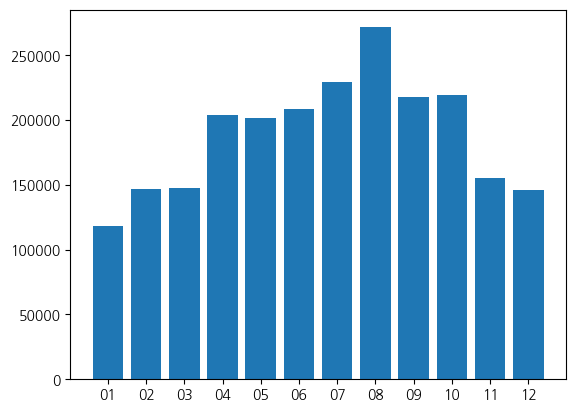

In [635]:
# 그래프 그리기
x = mean_df.index
y = mean_df.values
plt.bar(x, y)
plt.show()

In [636]:
### 각국((3개국 - 미국, 일본, 중국))의 환율과 방문객 추이 상관관계 구해보기 ###
fx = df[['USD', 'JPY', 'CNY']]
tourist = df[['미국', '일본', '중국']]
norm_fx = (fx - fx.min()) / (fx.max() - fx.min())
norm_tourist = (tourist - tourist.min()) / (tourist.max() - tourist.min())

merged_df = pd.merge(left=norm_tourist, right=norm_fx, left_index=True, right_index=True)
fx_corr = merged_df.corr()
fx_corr

,미국,일본,중국,USD,JPY,CNY
미국,1.000000,0.207549,0.032307,0.234285,0.210003,-0.394538
일본,0.207549,1.000000,0.083593,-0.235641,0.310599,0.008130
중국,0.032307,0.083593,1.000000,-0.134813,0.037900,0.216627
USD,0.234285,-0.235641,-0.134813,1.000000,0.238722,0.330201
JPY,0.210003,0.310599,0.037900,0.238722,1.000000,0.073952
CNY,-0.394538,0.008130,0.216627,0.330201,0.073952,1.000000


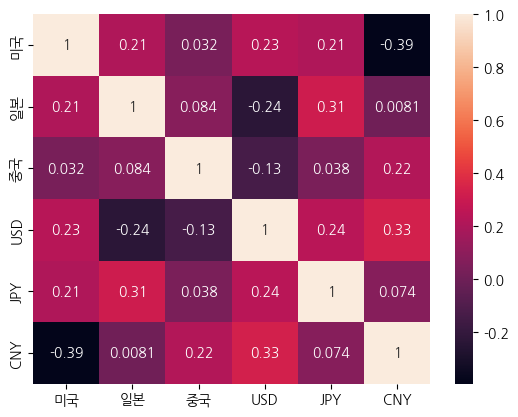

In [637]:
sns.heatmap(fx_corr, annot=True)
plt.show()

In [638]:
index.head()

,10Y,CNY,COP,GLD,JPY,S&P,USD,VIX,WTI
해당연월,,,,,,,,,
2013-01,131.28,174.95,3.7395,1662.0,11.8737,1498.11,1087.31,14.28,97.49
2013-02,132.70,174.22,3.5475,1579.8,11.7052,1514.68,1083.90,15.51,92.05
2013-03,131.98,178.88,3.4125,1597.4,11.7883,1569.19,1111.05,12.70,97.23
2013-04,133.36,178.61,3.1875,1473.5,11.3009,1597.57,1101.16,13.52,93.46
2013-05,130.25,184.27,3.3000,1394.2,11.2477,1630.74,1130.51,16.30,91.97


In [639]:
# (유가, 금, 구리, 미재무부채권10년물, S&P)과 제주도 전체방문자 수 상관관계 구해보기
total = df[jeju_tourist.columns].sum(axis=1)
total_df = pd.DataFrame({'전체':total, 'WTI':df['WTI'], '10Y':df['10Y'], 'COP':df['COP'], 'GLD':df['GLD'], 'S&P':df['S&P']})
total_df_corr = total_df.corr()
total_df_corr

,전체,WTI,10Y,COP,GLD,S&P
전체,1.000000,0.162202,0.387986,-0.262749,-0.168884,-0.450612
WTI,0.162202,1.000000,-0.134731,0.798253,0.314792,-0.454321
10Y,0.387986,-0.134731,1.000000,-0.284675,0.320615,-0.433085
COP,-0.262749,0.798253,-0.284675,1.000000,0.434047,-0.179851
GLD,-0.168884,0.314792,0.320615,0.434047,1.000000,0.143585
S&P,-0.450612,-0.454321,-0.433085,-0.179851,0.143585,1.000000


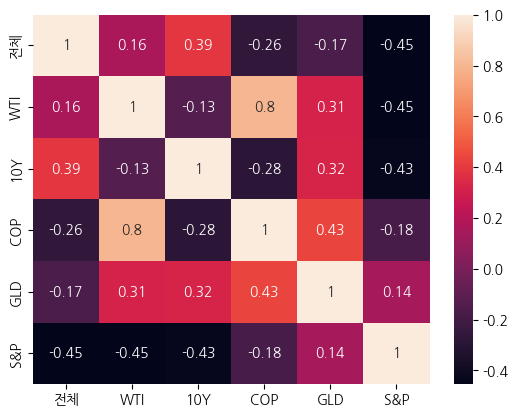

In [640]:
sns.heatmap(total_df_corr, annot=True)
plt.show()

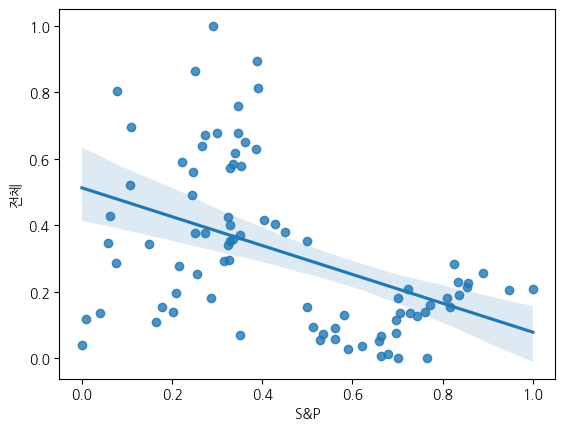

In [641]:
norm_total_df = (total_df - total_df.min()) / (total_df.max() - total_df.min())

sns.regplot(y="전체", x="S&P", data=norm_total_df)  # regression 회기시각화

# plt.plot(pd.to_datetime(total_df.index), norm_total_df['S&P'])
# plt.plot(pd.to_datetime(total_df.index), norm_total_df['전체'])

plt.show()